<a href="https://colab.research.google.com/github/ikerlobop/RetoColab/blob/main/Iker_Lobo_Perez_Retofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias necesarias para trabajar, y los Json y geoJson necesarios: 

concatenated_data.json

ubicacionsonometros.geojson

ubicaciontrafico.geojson

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from google.colab import files

uploaded = files.upload()



Saving concatenated_data.json to concatenated_data.json
Saving ubicacionsonometros.geojson to ubicacionsonometros.geojson
Saving ubicaciontrafico.geojson to ubicaciontrafico.geojson


Creamos un dataFrame con concatenated_data.json e imprimimos en pantalla.

In [ ]:
dfsonometros = pd.read_json('concatenated_data.json')
print(dfsonometros)





       nombre_dispositivo  decibelios                      address  status  \
0             BI-RUI-C003      51.599            MUELLE RIPA (RIA)       1   
1              BI-RUI-006      55.801              BARRENKALE   7        1   
2              BI-RUI-001      71.792     RODRIGUEZ ARIAS   71 BIS       1   
3              BI-RUI-004      58.390      PLAZA UNAMUNO FAROLA 13       1   
4              BI-RUI-019      62.662  ZUNZUNEGUI JUNTO BOCA METRO       1   
...                   ...         ...                          ...     ...   
168873         BI-RUI-006      54.549              BARRENKALE   7        1   
168874         BI-RUI-004      64.249      PLAZA UNAMUNO FAROLA 13       1   
168875         BI-RUI-011      72.635                   JARDINES 6       1   
168876         BI-RUI-019      69.399  ZUNZUNEGUI JUNTO BOCA METRO       1   
168877        BI-RUI-C005      55.700                     SOMERA 8       1   

             fecha       hora  ciudad  longitude   latitude  
0

Instalación e importación de Geopandas para poder manipular los geojson.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 8.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
import geopandas as gpd

Convertimos a dataFrame el geojson que contiene la ubicación de los sonómetros e imprimimos los 3 primeros resultados para comprobar.

In [ ]:
dfubicacion = gpd.read_file('ubicacionsonometros.geojson')
dfubicacion.head(3)

name     serialNumber status                   address deviceTypeId  \
0  BI-RUI-001  051999999991001      1  RODRIGUEZ ARIAS   71 BIS            1   
1  BI-RUI-004  051999999991004      1   PLAZA UNAMUNO FAROLA 13            1   
2  BI-RUI-006  051999999991006      1           BARRENKALE   7             1   

   longitude   latitude                   geometry  
0  -2.944465  43.263875  POINT (-2.94447 43.26388)  
1  -2.921691  43.258396  POINT (-2.92169 43.25840)  
2  -2.925136  43.256697  POINT (-2.92514 43.25670)

In [ ]:
print(dfubicacion)

           name     serialNumber status  \
0    BI-RUI-001  051999999991001      1   
1    BI-RUI-004  051999999991004      1   
2    BI-RUI-006  051999999991006      1   
3    BI-RUI-007  051999999991007      1   
4    BI-RUI-008  051999999991008      1   
5    BI-RUI-009  051999999991009      1   
6    BI-RUI-010  051999999991010      1   
7    BI-RUI-011  051999999991011      1   
8    BI-RUI-015  051999999991015      1   
9    BI-RUI-019  051999999991019      1   
10   BI-RUI-020  051999999991020      1   
11   BI-RUI-021  051999999991021      1   
12   BI-RUI-022  051999999991022      1   
13   BI-RUI-023  051999999991023      1   
14  BI-RUI-BR11  051999999992011      1   
15   BI-RUI-BR2  051999999992002      1   
16   BI-RUI-BR5  051999999992005      1   
17   BI-RUI-BR6  051999999992006      1   
18   BI-RUI-BR7  051999999992007      1   
19   BI-RUI-BR8  051999999992008      1   
20  BI-RUI-C002  051999999993002      1   
21  BI-RUI-C003  051999999993003      1   
22  BI-RUI-

Para trabajar la geometría del geoJson vamos a sacar los campos de Geometry, se establece que la geometría de ubicación son puntos y sus respectivas coordenadas.

In [ ]:
dfubicacion ['geometry']

0     POINT (-2.94447 43.26388)
1     POINT (-2.92169 43.25840)
2     POINT (-2.92514 43.25670)
3     POINT (-2.94440 43.27109)
4     POINT (-2.91925 43.25802)
5     POINT (-2.92542 43.25775)
6     POINT (-2.92534 43.25723)
7     POINT (-2.92504 43.25827)
8     POINT (-2.92464 43.25756)
9     POINT (-2.94862 43.26159)
10    POINT (-2.94242 43.26246)
11    POINT (-2.94161 43.26221)
12    POINT (-2.94045 43.26203)
13    POINT (-2.96494 43.28063)
14    POINT (-2.91253 43.25567)
15    POINT (-2.92826 43.26356)
16    POINT (-2.92312 43.26176)
17    POINT (-2.90330 43.26026)
18    POINT (-2.92024 43.24661)
19    POINT (-2.91615 43.26394)
20    POINT (-2.92769 43.26416)
21    POINT (-2.92464 43.26125)
22    POINT (-2.92279 43.25641)
23    POINT (-2.92279 43.26102)
24    POINT (-2.92475 43.26161)
25    POINT (-2.92253 43.25699)
26    POINT (-2.92865 43.26435)
27    POINT (-2.92232 43.25909)
28    POINT (-2.94133 43.25754)
29    POINT (-2.93507 43.25037)
30    POINT (-2.94733 43.27206)
31    PO

Imprimimos en pantalla el resultado con plot(), esto nos ubicará los puntos en una serie de coordenadas.

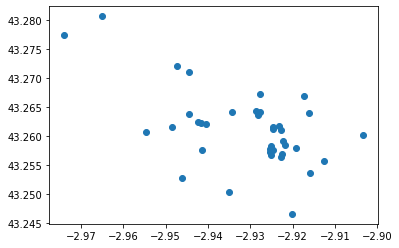

In [ ]:
dfubicacion.plot()


Lo mismo hacemos con la ubicación del tráfico.

In [ ]:
dftrafico = gpd.read_file('ubicaciontrafico.geojson')
dftrafico.head(3)

CodigoSeccion Ocupacion Intensidad Velocidad           FechaHora  \
0           248         4         24         0 2023-02-20 22:45:00   
1           273         0        174         0 2023-02-20 22:45:00   
2           274        99          0         0 2023-02-20 22:45:00   

                                            geometry  
0  POLYGON ((-2.92905 43.26388, -2.92904 43.26387...  
1  POLYGON ((-2.94676 43.26119, -2.94676 43.26120...  
2  POLYGON ((-2.94624 43.26247, -2.94624 43.26247...

In [ ]:
print(dftrafico)

   CodigoSeccion Ocupacion Intensidad Velocidad           FechaHora  \
0            248         4         24         0 2023-02-20 22:45:00   
1            273         0        174         0 2023-02-20 22:45:00   
2            274        99          0         0 2023-02-20 22:45:00   
3            275         0        186        17 2023-02-20 22:45:00   
4            276         2        184         4 2023-02-20 22:45:00   
..           ...       ...        ...       ...                 ...   
76           392         0        224        21 2023-02-20 22:45:00   
77           393         0        241        26 2023-02-20 22:45:00   
78           396         0        205        24 2023-02-20 22:45:00   
79           398         0         96        14 2023-02-20 22:45:00   
80           399         0        -95         0 2023-02-20 22:45:00   

                                             geometry  
0   POLYGON ((-2.92905 43.26388, -2.92904 43.26387...  
1   POLYGON ((-2.94676 43.26119, -2

In [ ]:
dftrafico['geometry']

0     POLYGON ((-2.92905 43.26388, -2.92904 43.26387...
1     POLYGON ((-2.94676 43.26119, -2.94676 43.26120...
2     POLYGON ((-2.94624 43.26247, -2.94624 43.26247...
3     POLYGON ((-2.94567 43.26387, -2.94530 43.26475...
4     POLYGON ((-2.94547 43.26489, -2.94587 43.26392...
                            ...                        
76    POLYGON ((-2.95305 43.26367, -2.95283 43.26367...
77    POLYGON ((-2.95025 43.26284, -2.95102 43.26323...
78    POLYGON ((-2.95020 43.26252, -2.95020 43.26251...
79    POLYGON ((-2.95105 43.26080, -2.95154 43.25959...
80    POLYGON ((-2.95149 43.25954, -2.95126 43.26008...
Name: geometry, Length: 81, dtype: geometry

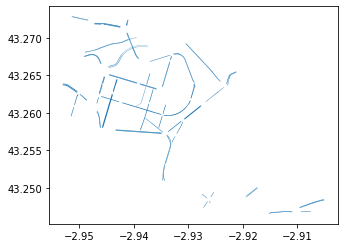

In [ ]:
dftrafico.plot()

Hacemos la unión del primer gráfico del geojson con el segundo geojson, podremos ver el la incidencia del tráfico y los sonómetros en el mismo gráfico.

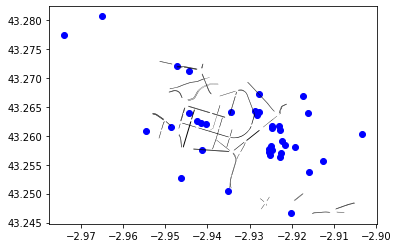

In [ ]:

fig, ax = plt.subplots()
dfubicacion.plot(ax=ax, color='blue')
dftrafico.plot( ax=ax, color='black')
plt.show()

Queremos que esta representación sea más gráfica y debemos añadirle un mapa con contextily, instalamos e importamos.

In [ ]:
pip install contextily


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 14.1 MB/s eta 0:00:00


Ahora podemos ver un mapa fusionando la ubicación de los sonómetros y la incidencia del tráfico.

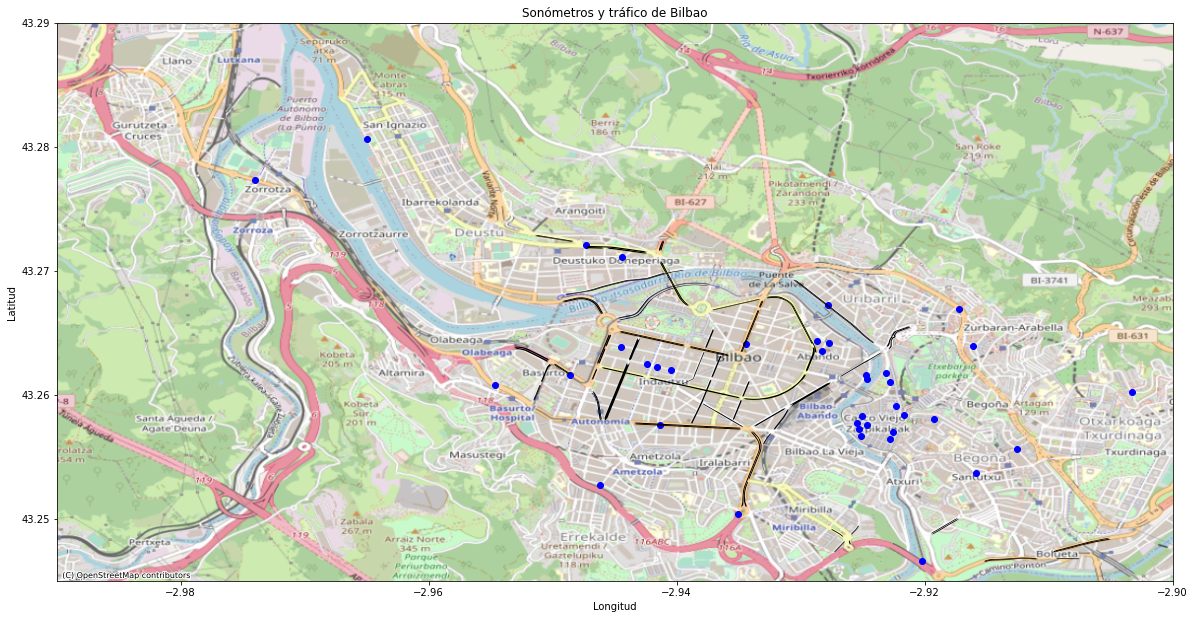

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx


fig, ax = plt.subplots(figsize=(20, 20))

#coordenadas bilbao
ax.set_xlim(-2.99, -2.90)
ax.set_ylim(43.245, 43.290)

ax.set_title("Sonómetros y tráfico de Bilbao")

ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

dfubicacion.plot(ax=ax, color='blue')
dftrafico.plot(ax=ax, color='black')

ctx.add_basemap(ax, crs=dfubicacion.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()


Empezamos a limpiar datos y a ordenar

In [ ]:
result = dfsonometros.loc[dfsonometros['decibelios'] > 100]
result = result.sort_values(by='decibelios', ascending=False)
print(result)


       nombre_dispositivo  decibelios              address  status  \
47265         BI-RUI-C005       117.6             SOMERA 8       1   
118446        BI-RUI-C005       116.8             SOMERA 8       1   
80431         BI-RUI-C006       115.1    VIUDA DE EPALZA 3       1   
47263         BI-RUI-C005       113.8             SOMERA 8       1   
163163         BI-RUI-021       113.0             POZA 53        1   
48432          BI-RUI-021       112.9             POZA 53        1   
151245         BI-RUI-021       112.5             POZA 53        1   
137883         BI-RUI-021       112.4             POZA 53        1   
108232         BI-RUI-021       112.4             POZA 53        1   
148125         BI-RUI-021       112.2             POZA 53        1   
32629          BI-RUI-021       112.0             POZA 53        1   
129173         BI-RUI-021       110.3             POZA 53        1   
28154          BI-RUI-021       110.3             POZA 53        1   
13630          BI-RU

Ahora buscamos las calles con el mayor promedio de decibelios ordenados de mayor a menor.

In [ ]:
result1 = dfsonometros.groupby('address')['decibelios'].mean().sort_values(ascending=False)
print(result1)

address
JUAN DE GARAI (ROTONDA)(CÁMARA TRÁFICO)            74.668539
POZA 53                                            71.598443
MAURICE RAVEL (CON SAN VALENTÍN BERRIOTXOA)        68.700855
SANTUTXU (CON KARMELO 1)(CÁMARA TRÁFICO)           68.095066
POZA 48                                            67.893588
GORDÓNIZ (CON GOYA)(CÁMARA TRÁFICO)                67.756653
MONTEVIDEO (FRENTE HOSPITAL)(CÁMARA TRÁFICO)       67.616795
JARDINES 6                                         67.324929
AUTONOMÍA 33 (ESQUINA GORDÓNIZ)(CÁMARA TRÁFICO)    66.860846
ZUNZUNEGUI JUNTO BOCA METRO                        66.774696
ALAMEDA REKALDE 27                                 65.954069
BARRENKALE BARRENA 7                               64.707358
FRAY JUAN 24                                       64.539956
AVENIDA MADARIAGA 3-5                              63.907209
VIUDA DE EPALZA FRENTE 11                          63.828937
SANTA MARIA 18                                     63.491959
PLAZA UNAMUNO FA

Hacemos un gráfico con el promedio.

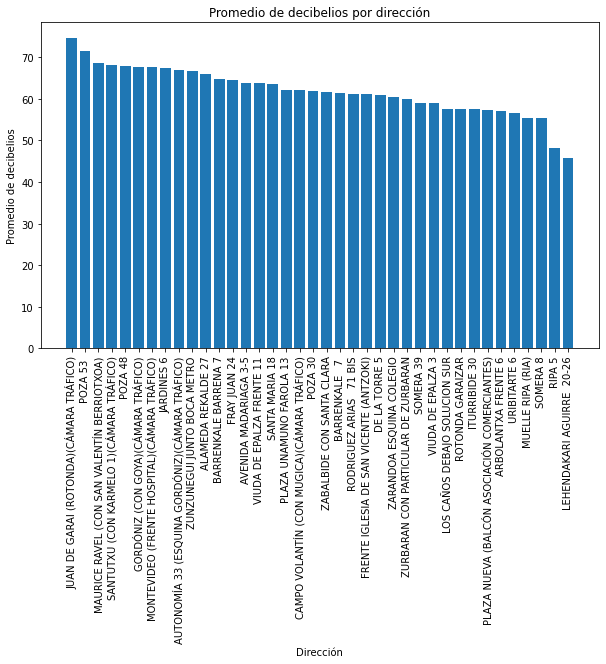

In [ ]:
import matplotlib.pyplot as plt

result2 = dfsonometros.groupby('address')['decibelios'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(result2.index, result2.values)
plt.xticks(rotation=90)
plt.xlabel('Dirección')
plt.ylabel('Promedio de decibelios')
plt.title('Promedio de decibelios por dirección')
plt.show()

Categorizamos el sonido en referencia a la escala que tenemos a continuación: 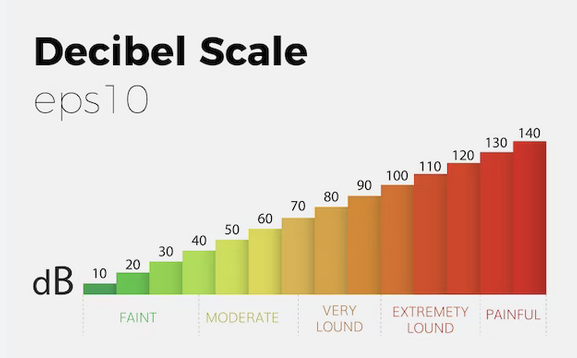

In [ ]:
import numpy as np

def categorize_sound(decibels):
    conditions = [decibels < 20, (decibels >= 20) & (decibels < 40), (decibels >= 40) & (decibels < 60), (decibels >= 60) & (decibels < 80),
                  (decibels >= 80) & (decibels < 100), (decibels >= 100) & (decibels < 120), decibels >= 120]
    choices = ['Suave', 'Moderado', 'Fuerte', 'Muy fuerte', 'Molesto', 'Extremadamente Molesto', 'Doloroso']
    return np.select(conditions, choices, default='Invalido')

result['categoría_sonido'] = result['decibelios'].apply(categorize_sound)


In [ ]:
print(result)

       nombre_dispositivo  decibelios              address  status  \
47265         BI-RUI-C005       117.6             SOMERA 8       1   
118446        BI-RUI-C005       116.8             SOMERA 8       1   
80431         BI-RUI-C006       115.1    VIUDA DE EPALZA 3       1   
47263         BI-RUI-C005       113.8             SOMERA 8       1   
163163         BI-RUI-021       113.0             POZA 53        1   
48432          BI-RUI-021       112.9             POZA 53        1   
151245         BI-RUI-021       112.5             POZA 53        1   
137883         BI-RUI-021       112.4             POZA 53        1   
108232         BI-RUI-021       112.4             POZA 53        1   
148125         BI-RUI-021       112.2             POZA 53        1   
32629          BI-RUI-021       112.0             POZA 53        1   
129173         BI-RUI-021       110.3             POZA 53        1   
28154          BI-RUI-021       110.3             POZA 53        1   
13630          BI-RU

Promedio de todos los sonómetros de Bilbao

In [ ]:
promedio = dfsonometros['decibelios'].mean()
categoria_promedio = categorize_sound(round(promedio, 2))
print(f"El promedio total de decibelios es {promedio:.2f}, que corresponde a la categoría de sonido '{categoria_promedio}'.")

El promedio total de decibelios es 59.73, que corresponde a la categoría de sonido 'Fuerte'.


Para trabajar tenemos que saber que tipos y que columnas tenemos en cada dataFrame.

In [ ]:
dfsonometros.dtypes

nombre_dispositivo     object
decibelios            float64
address                object
status                  int64
fecha                  object
hora                   object
ciudad                 object
longitude              object
latitude               object
dtype: object

In [ ]:
dfubicacion.columns

Index(['name', 'serialNumber', 'status', 'address', 'deviceTypeId',
       'longitude', 'latitude', 'geometry'],
      dtype='object')

In [ ]:
dfsonometros.columns

Index(['nombre_dispositivo', 'decibelios', 'address', 'status', 'fecha',
       'hora', 'ciudad', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
dfsonometros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168878 entries, 0 to 168877
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nombre_dispositivo  168878 non-null  object 
 1   decibelios          168878 non-null  float64
 2   address             168878 non-null  object 
 3   status              168878 non-null  int64  
 4   fecha               168878 non-null  object 
 5   hora                168878 non-null  object 
 6   ciudad              168878 non-null  object 
 7   longitude           168878 non-null  object 
 8   latitude            168878 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.6+ MB


In [ ]:
dfsonometros.value_counts()

nombre_dispositivo  decibelios  address                                  status  fecha       hora       ciudad  longitude  latitude 
BI-RUI-P006         77.600      JUAN DE GARAI (ROTONDA)(CÁMARA TRÁFICO)  1       2023-01-23  Tarde      Bilbao  -2,935071  43,25037     32
                                                                                 2023-02-09  Tarde      Bilbao  -2,935071  43,25037     32
                                                                                 2023-01-16  Tarde      Bilbao  -2,935071  43,25037     32
                                                                                 2023-02-10  Tarde      Bilbao  -2,935071  43,25037     32
                                                                                 2023-01-24  Tarde      Bilbao  -2,935071  43,25037     32
                                                                                                                                        ..
BI-RUI-BR11         59.739      Z

In [ ]:
dfsonometros.shape


(168878, 9)

In [ ]:
dfsonometros.describe


<bound method NDFrame.describe of        nombre_dispositivo  decibelios                      address  status  \
0             BI-RUI-C003      51.599            MUELLE RIPA (RIA)       1   
1              BI-RUI-006      55.801              BARRENKALE   7        1   
2              BI-RUI-001      71.792     RODRIGUEZ ARIAS   71 BIS       1   
3              BI-RUI-004      58.390      PLAZA UNAMUNO FAROLA 13       1   
4              BI-RUI-019      62.662  ZUNZUNEGUI JUNTO BOCA METRO       1   
...                   ...         ...                          ...     ...   
168873         BI-RUI-006      54.549              BARRENKALE   7        1   
168874         BI-RUI-004      64.249      PLAZA UNAMUNO FAROLA 13       1   
168875         BI-RUI-011      72.635                   JARDINES 6       1   
168876         BI-RUI-019      69.399  ZUNZUNEGUI JUNTO BOCA METRO       1   
168877        BI-RUI-C005      55.700                     SOMERA 8       1   

             fecha       hora

In [ ]:
dfsonometros.describe()

decibelios        status
count  168878.000000  168878.00000
mean       59.732676       1.00106
std        10.631793       0.03254
min        22.400000       1.00000
25%        53.829250       1.00000
50%        60.700000       1.00000
75%        67.100000       1.00000
max       117.600000       2.00000

Veces que han sido contados la cantidad exacta de Decibelios, situando los más frecuentes entre 50 y 75 decibelios.

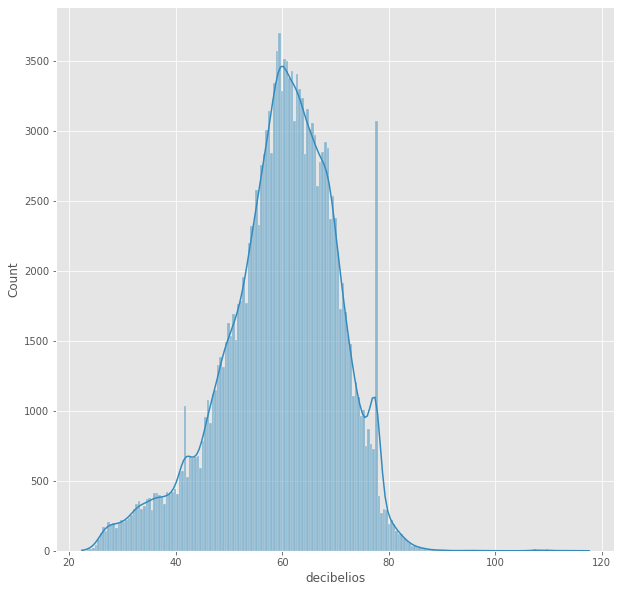

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.histplot(dfsonometros.decibelios, kde=True)

Recogemos el Status de los sonometros podemos ver que de las 169430 veces que ha recogido el sonido:


*   1 representan las veces que funcionan
*   2 representan las veces que no recogen sonido



In [ ]:
dfsonometros['status'].value_counts()

1    168699
2       179
Name: status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


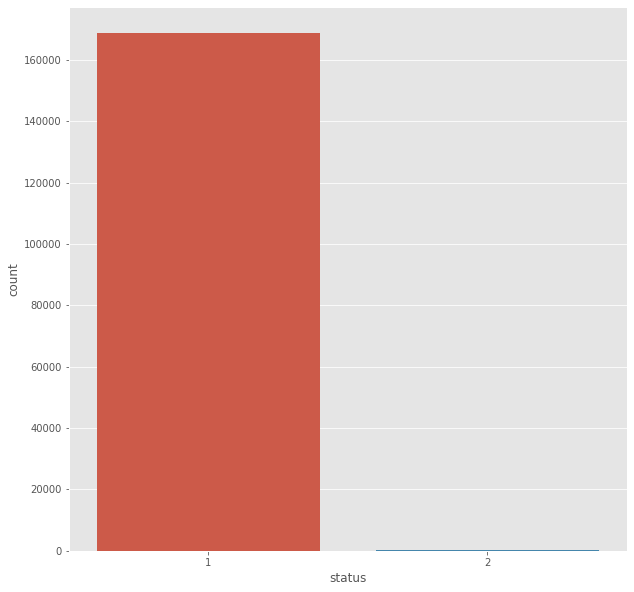

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(dfsonometros.status)



```
# Tiene formato de código
```

El que más muestras ha recogido corresponde al dispositivo BI-RUI-C005 que corresponde a Somera 8

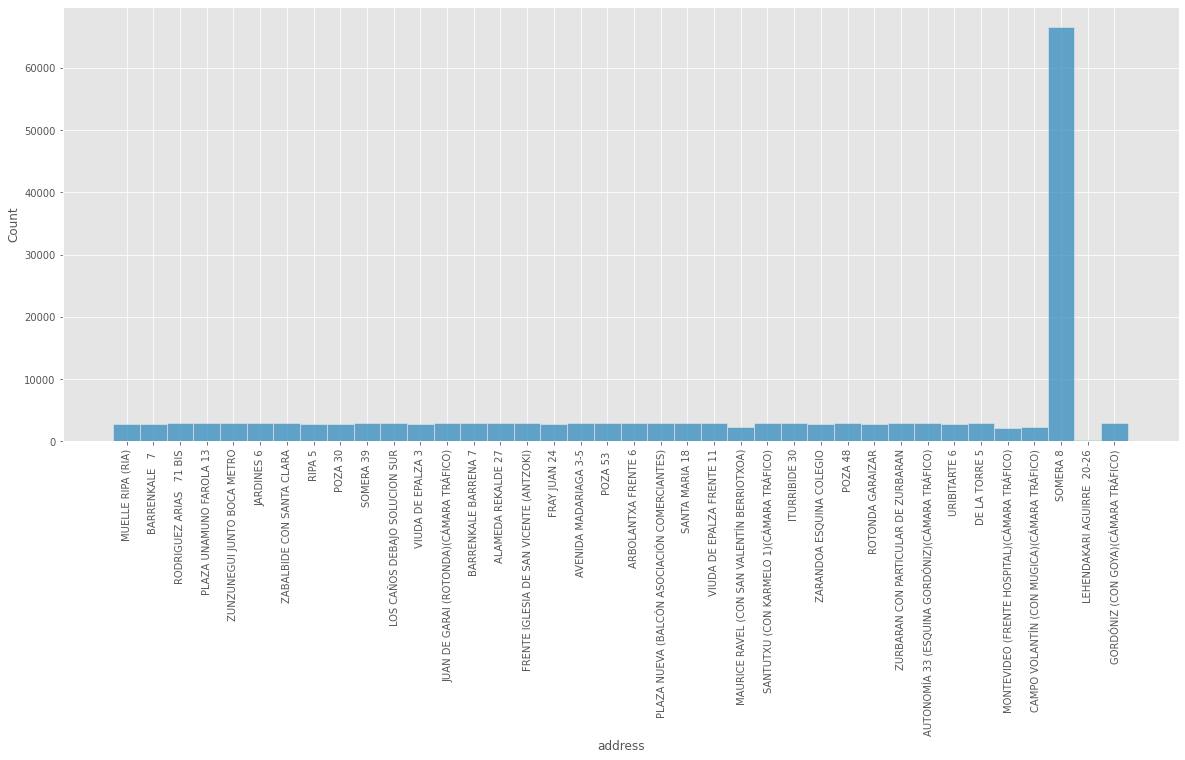

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')
plt.xticks(rotation=90)
sns.histplot(dfsonometros.address)

Figuras en forma de violín, su altura representa el rango de decibelios, su anchura las veces que ha sido contado ese número dentro del rango.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


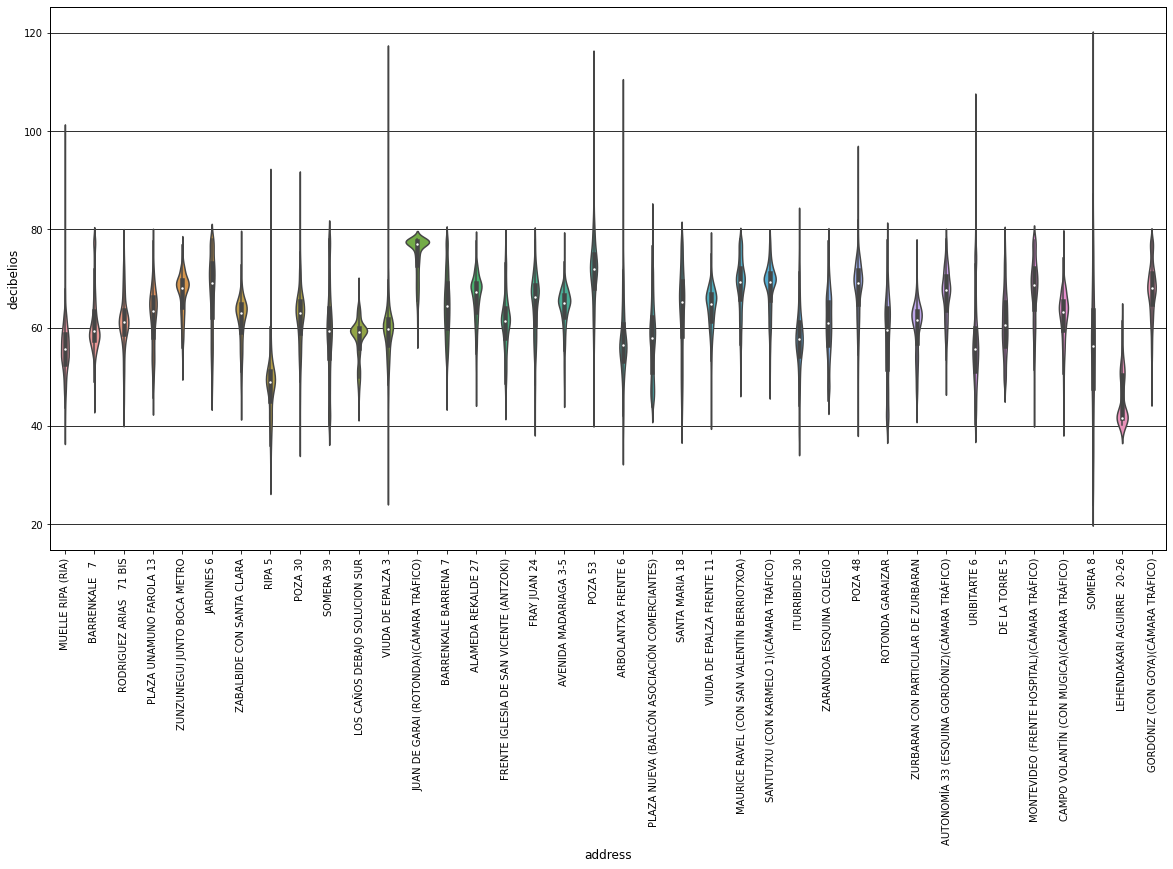

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('grayscale')
plt.xticks(rotation=90)
sns.violinplot(dfsonometros.address, dfsonometros.decibelios)

Sonométro en Somera 8

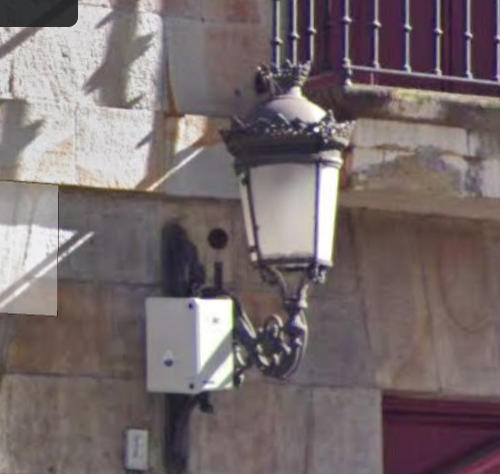

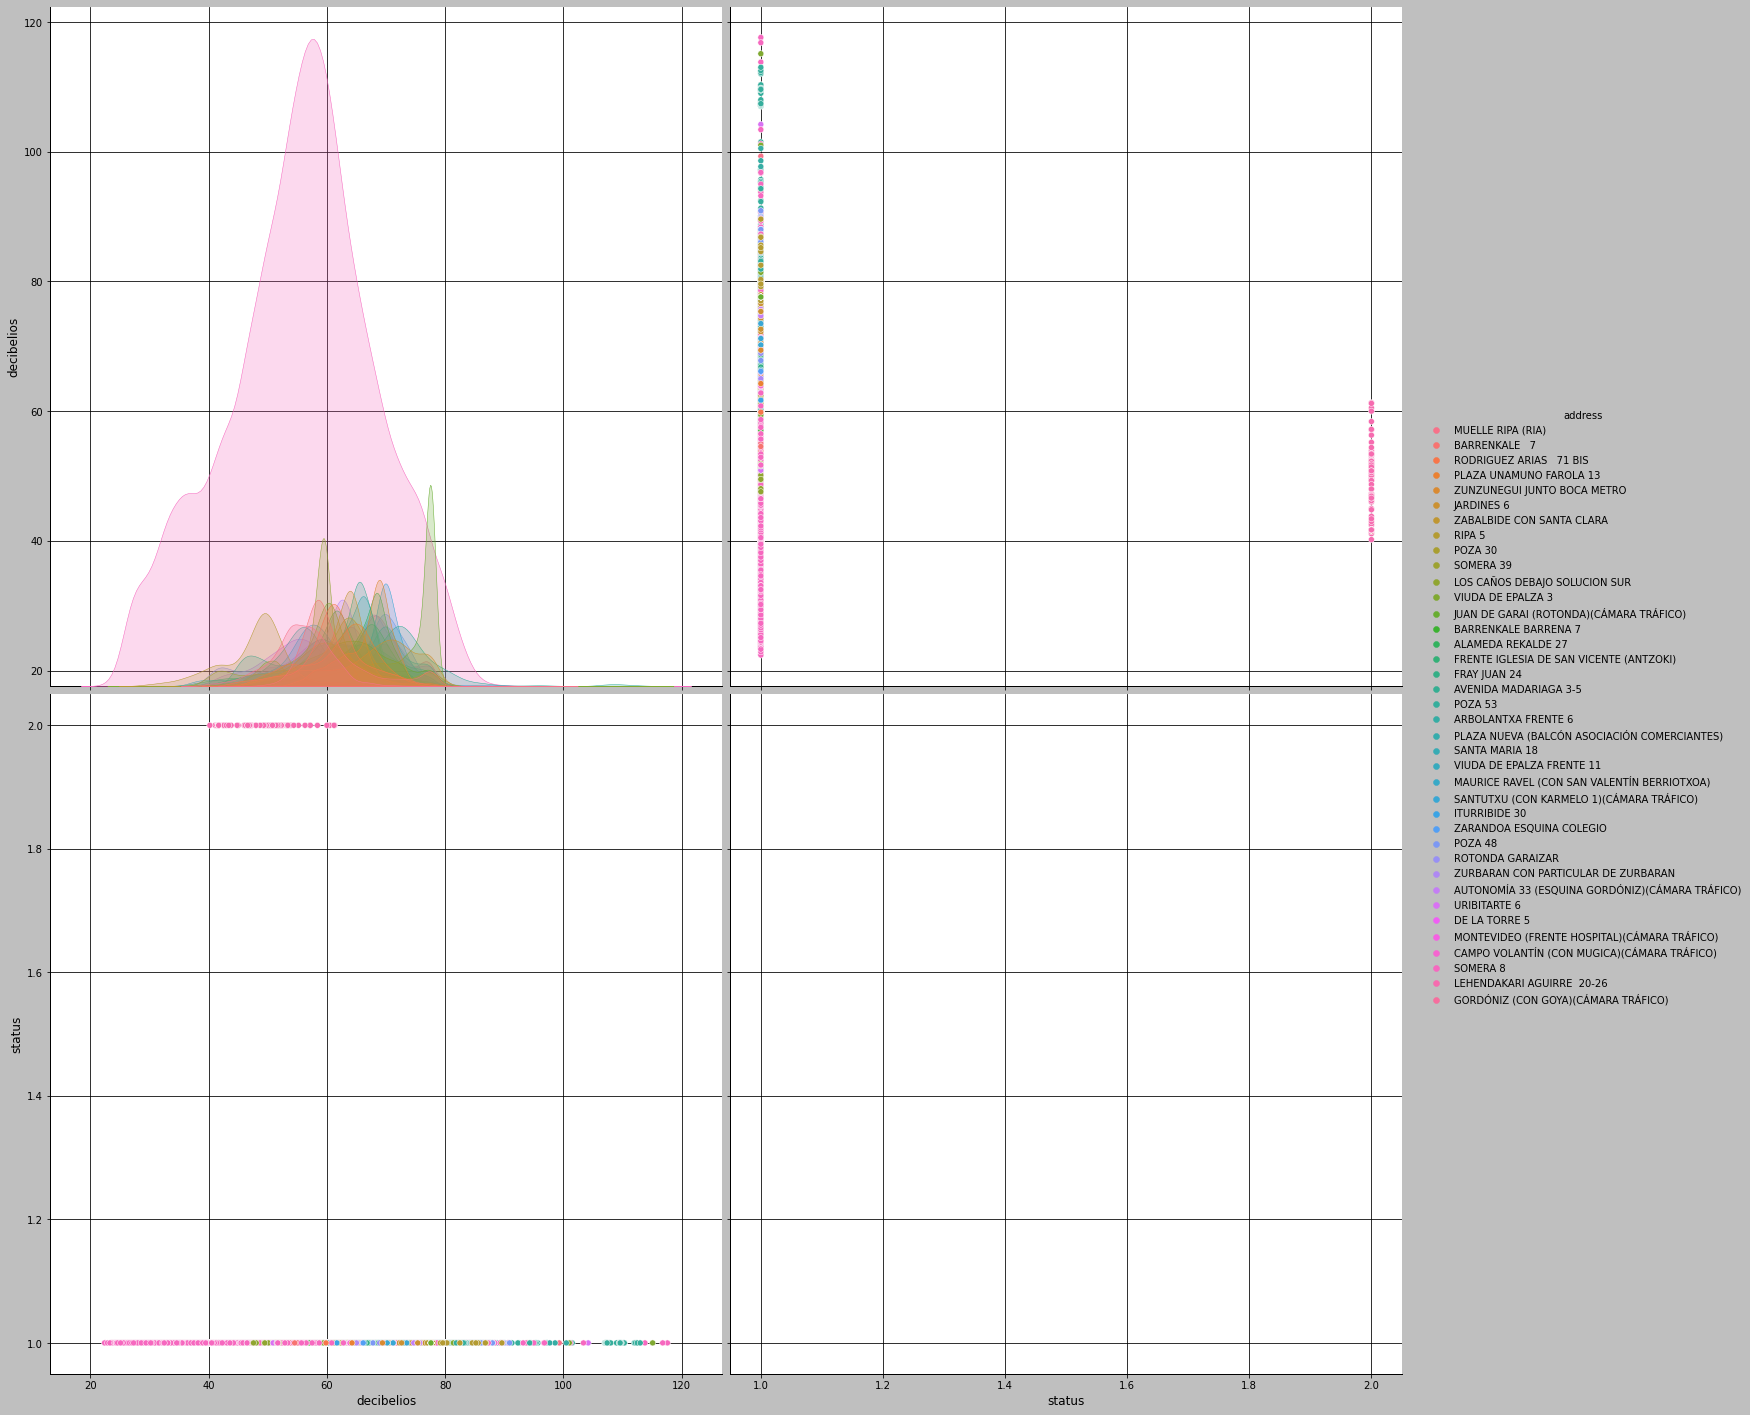

In [ ]:
plt.style.use('seaborn-dark-palette')
sns.pairplot(dfsonometros ,hue='address', height=10)
plt.show()

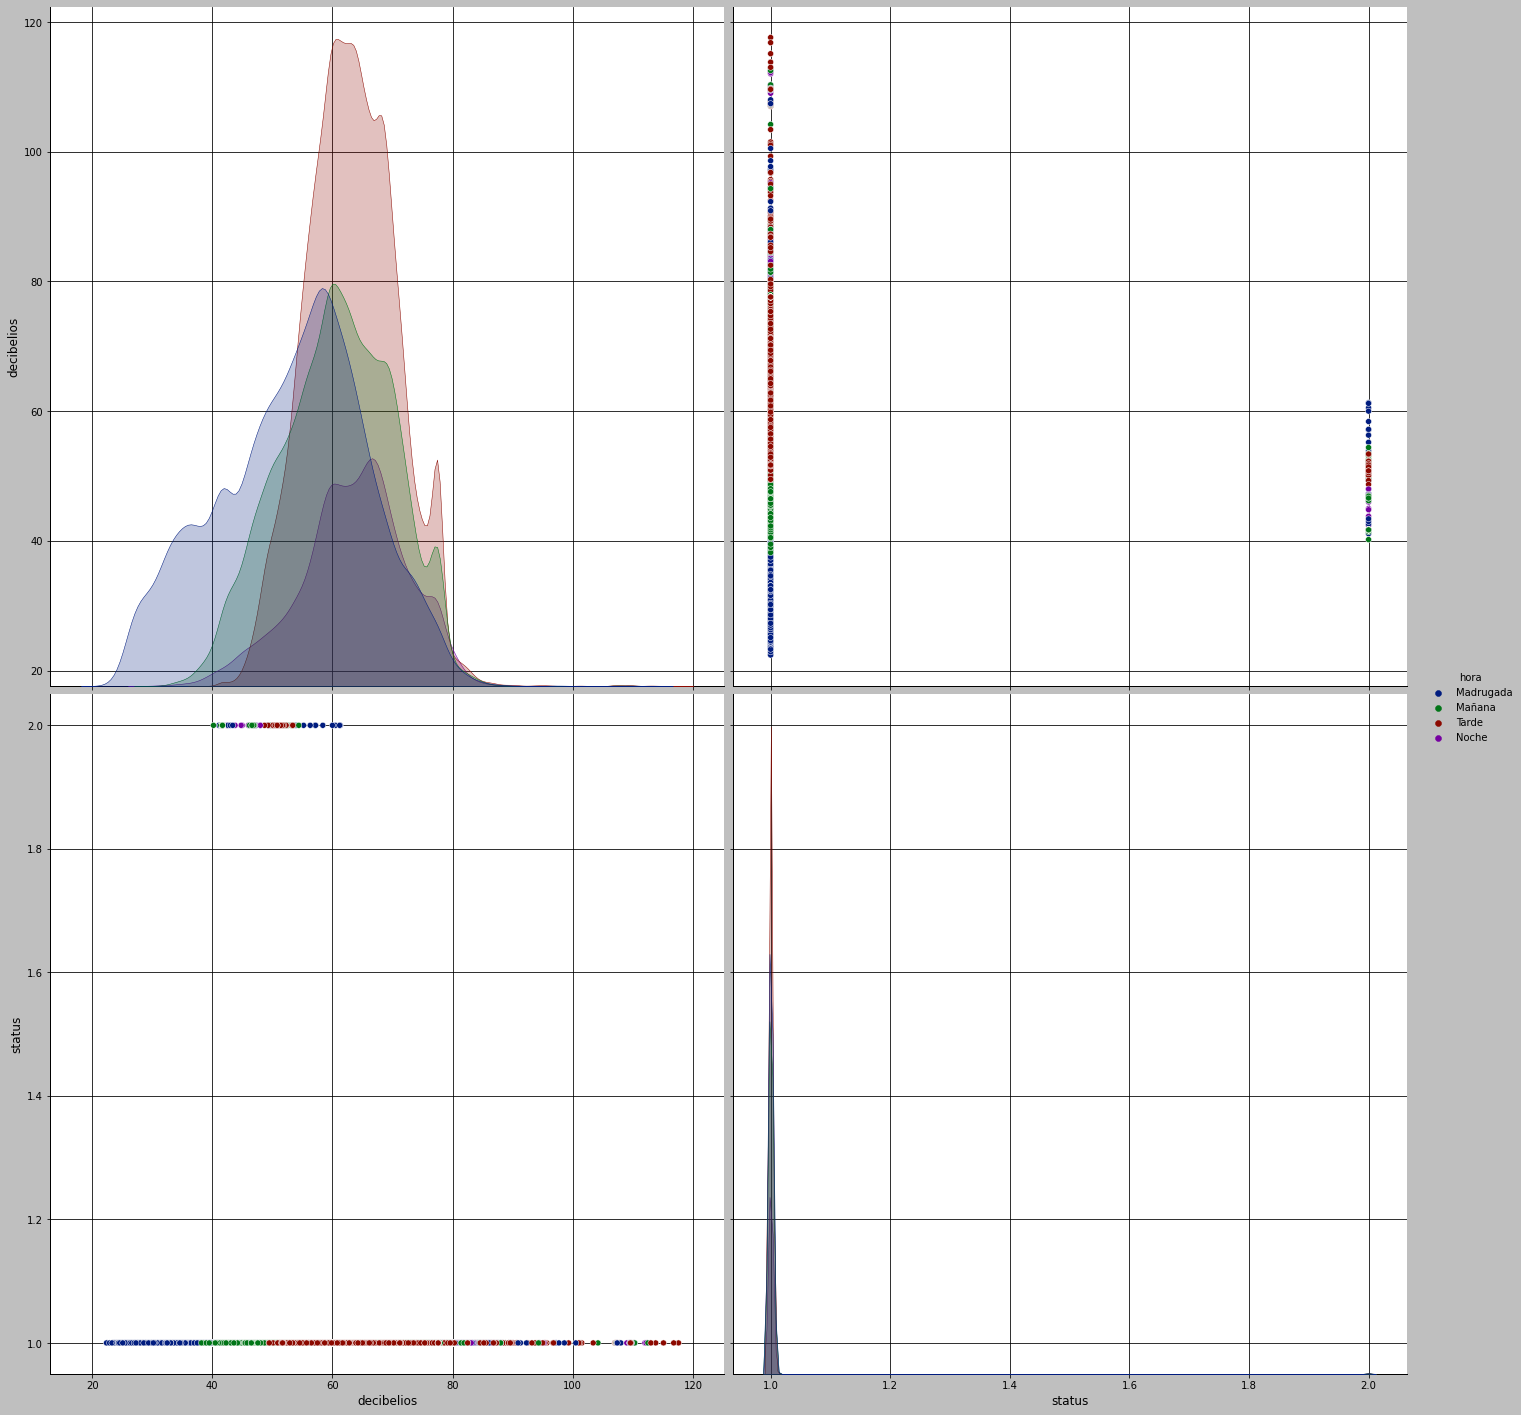

In [ ]:
plt.style.use('seaborn-dark-palette')
sns.pairplot(dfsonometros, hue='hora', height=10)
plt.show()

Previsiones

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar las características (X) y la etiqueta (y)
X = dfsonometros[['decibelios']]
y = dfsonometros['status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)




Precisión: 0.9989933680720038


In [ ]:
pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


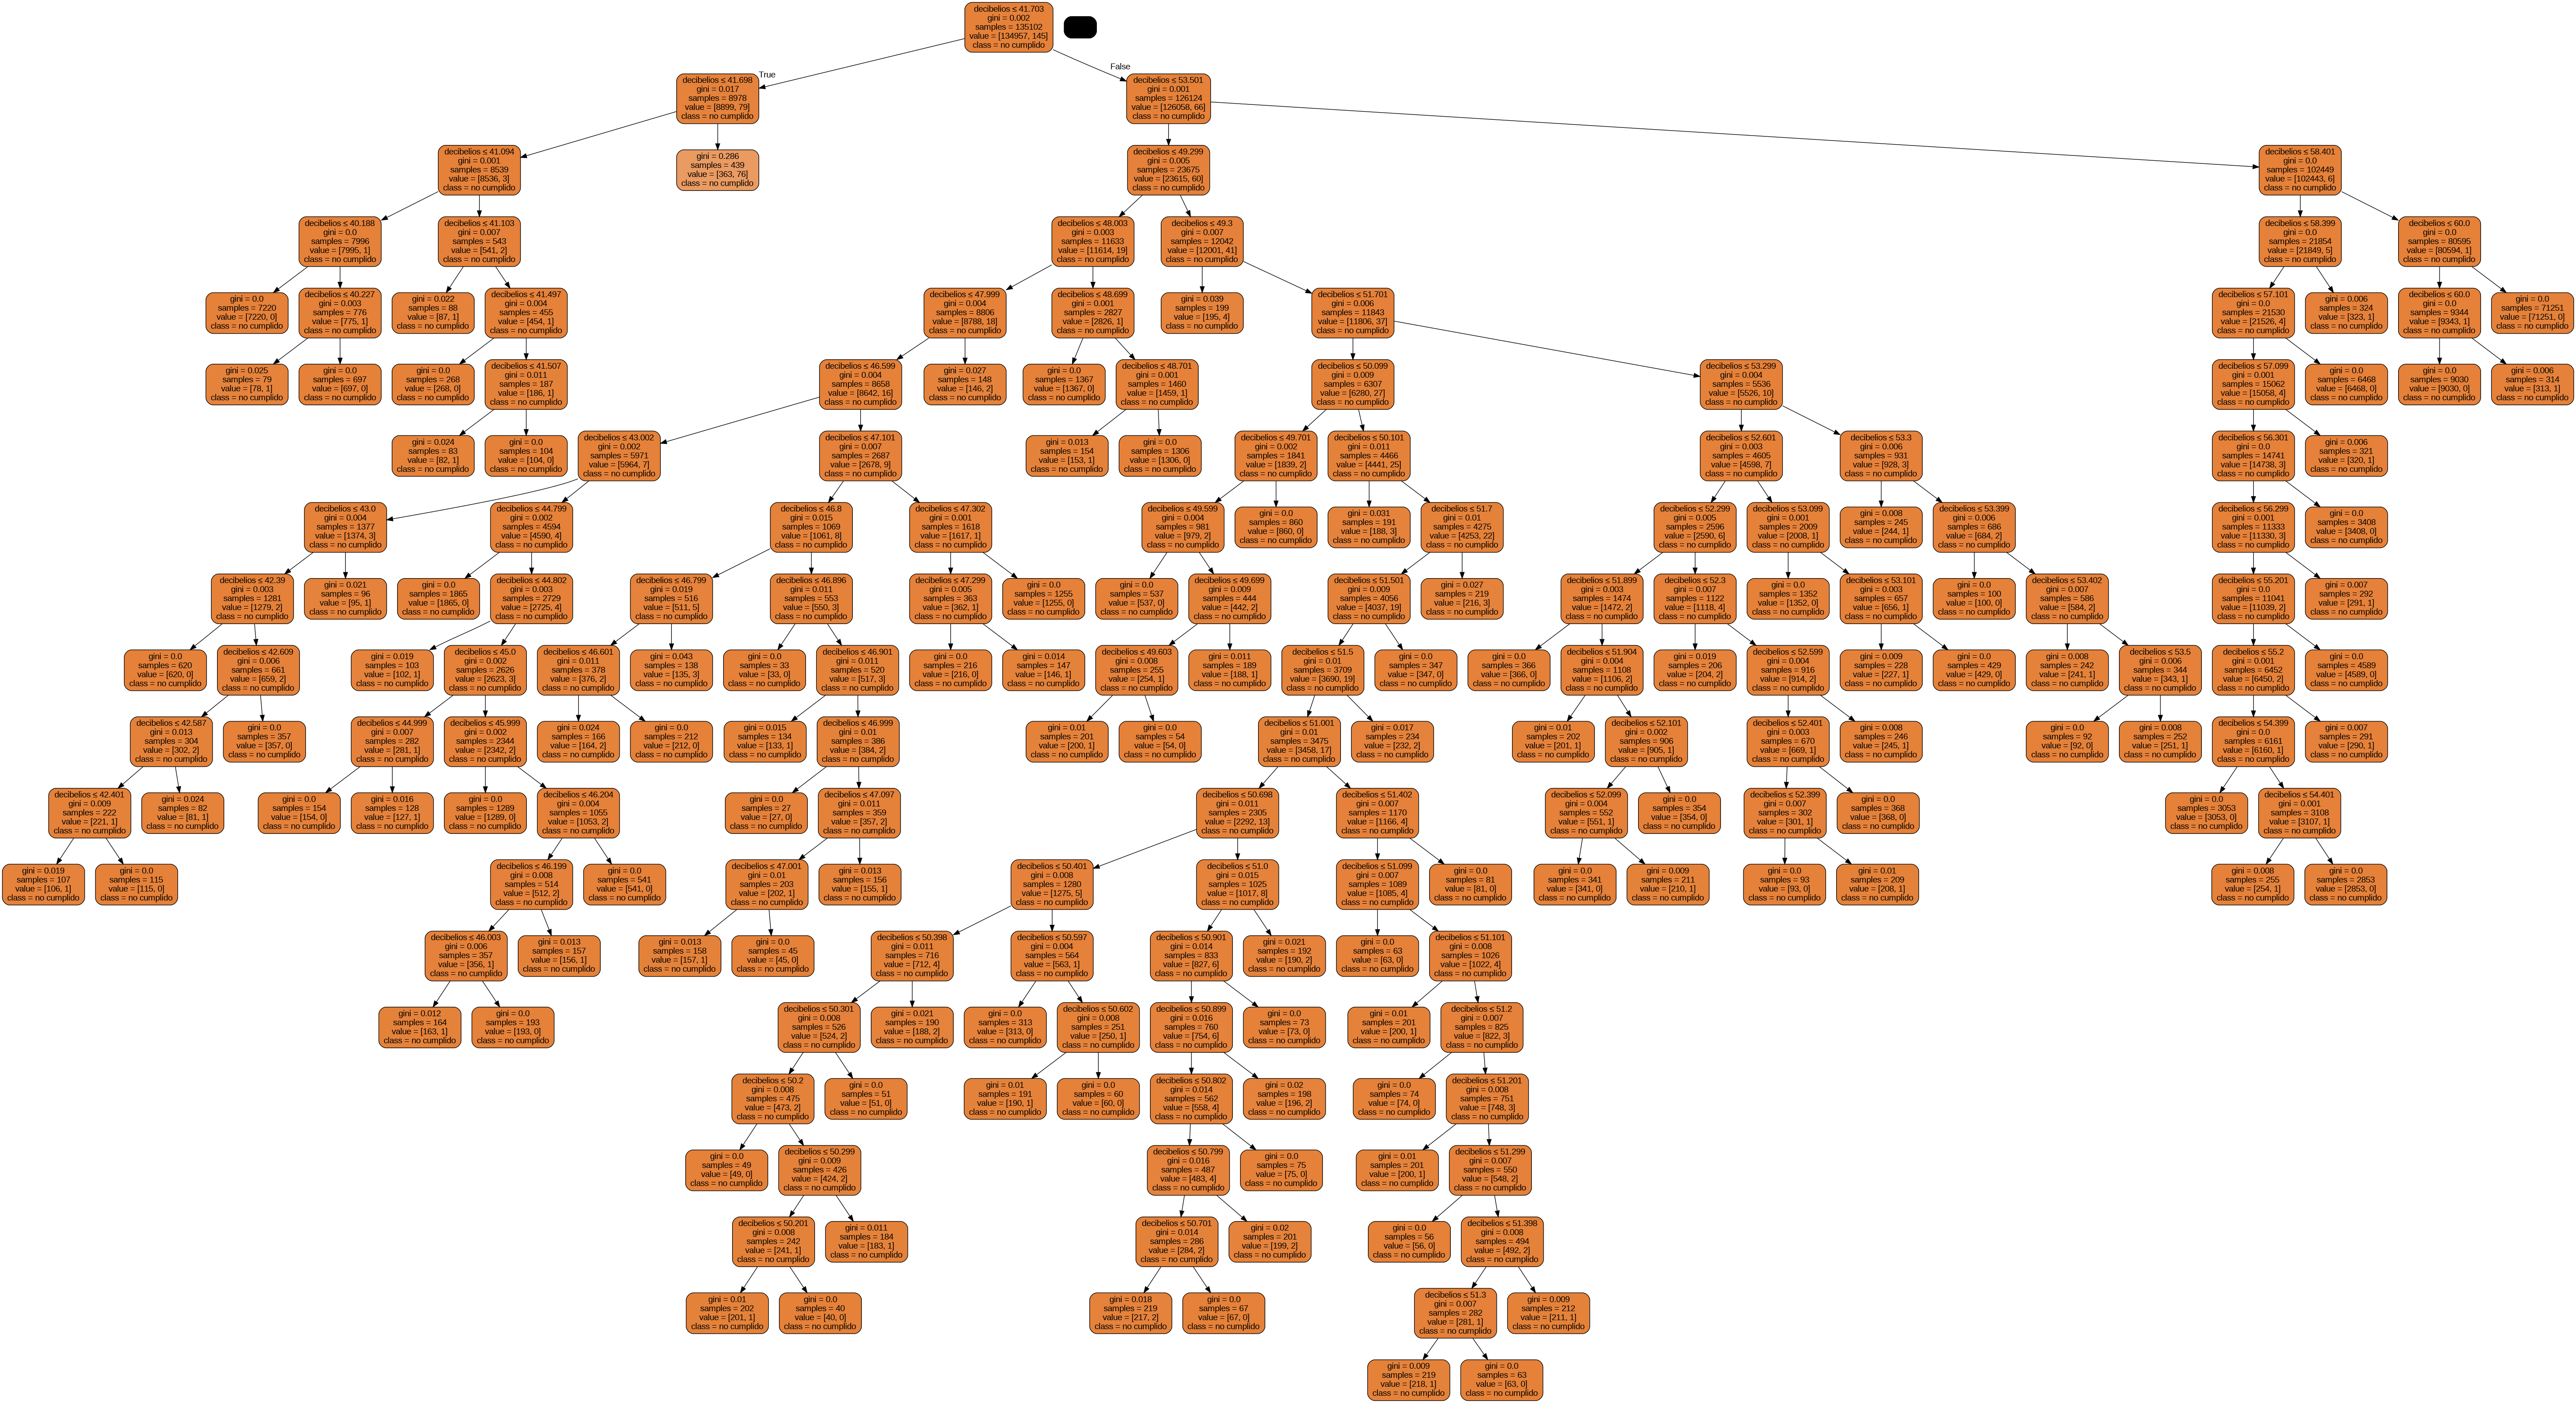

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=['decibelios'],
                           class_names=['no cumplido', 'cumplido'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Cargamos los datos del DataFrame dfsonometros en df2sonometros
df2sonometros = dfsonometros.copy()

# Convertimos la columna "decibelios" de cadenas a números
df2sonometros['decibelios'] = pd.to_numeric(df2sonometros['decibelios'])

# Reemplazamoa comas por puntos en las columnas "longitude" y "latitude"
df2sonometros['longitude'] = df2sonometros['longitude'].str.replace(',', '.').astype(float)
df2sonometros['latitude'] = df2sonometros['latitude'].str.replace(',', '.').astype(float)

# Divididimos los datos en conjunto de entrenamiento y conjunto de prueba
train_data = df2sonometros.sample(frac=0.8, random_state=1)
test_data = df2sonometros.drop(train_data.index)

# Entrenamos un modelo de regresión lineal utilizando la columna "decibelios" como variable de entrada
# y las columnas "longitude" y "latitude" como variables de salida
model = LinearRegression()
model.fit(train_data[['longitude', 'latitude']], train_data['decibelios'])

# Hacemos predicciones en el conjunto de prueba
predictions = model.predict(test_data[['longitude', 'latitude']])

# Imprimimos las primeras 10 predicciones y los valores reales correspondientes
print(predictions[:10])
print(test_data['decibelios'][:10])


[58.67100815 59.1983688  58.64575109 58.76336843 68.50061667 65.79519903
 62.86616626 58.64575109 59.69036588 59.41984466]
0     51.599
5     62.623
7     42.600
9     54.023
16    49.200
26    50.051
27    67.100
42    44.400
43    52.198
46    66.569
Name: decibelios, dtype: float64


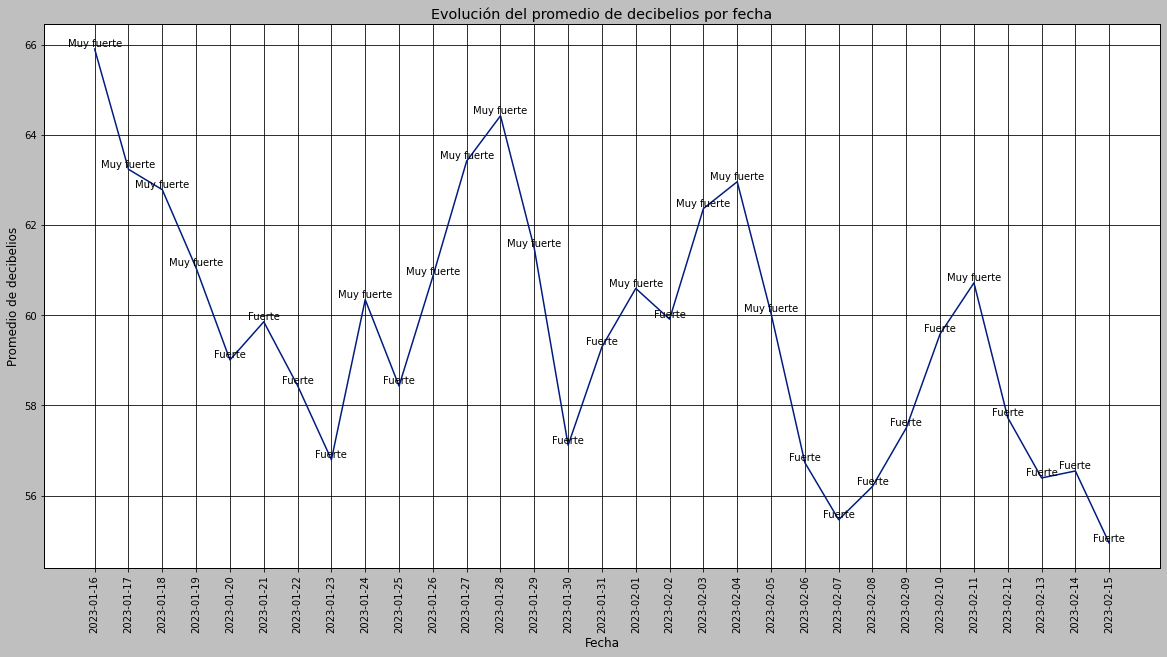

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
df_promedio = dfsonometros.groupby('fecha')['decibelios'].mean().reset_index()
df_promedio['categoria_sonido'] = df_promedio['decibelios'].apply(categorize_sound)

plt.plot(df_promedio['fecha'], df_promedio['decibelios'])


for i, row in df_promedio.iterrows():
    plt.text(row['fecha'], row['decibelios'], row['categoria_sonido'], ha='center', va='bottom')

plt.xlabel('Fecha')
plt.ylabel('Promedio de decibelios')
plt.title('Evolución del promedio de decibelios por fecha')
plt.xticks(rotation=90)
plt.show()


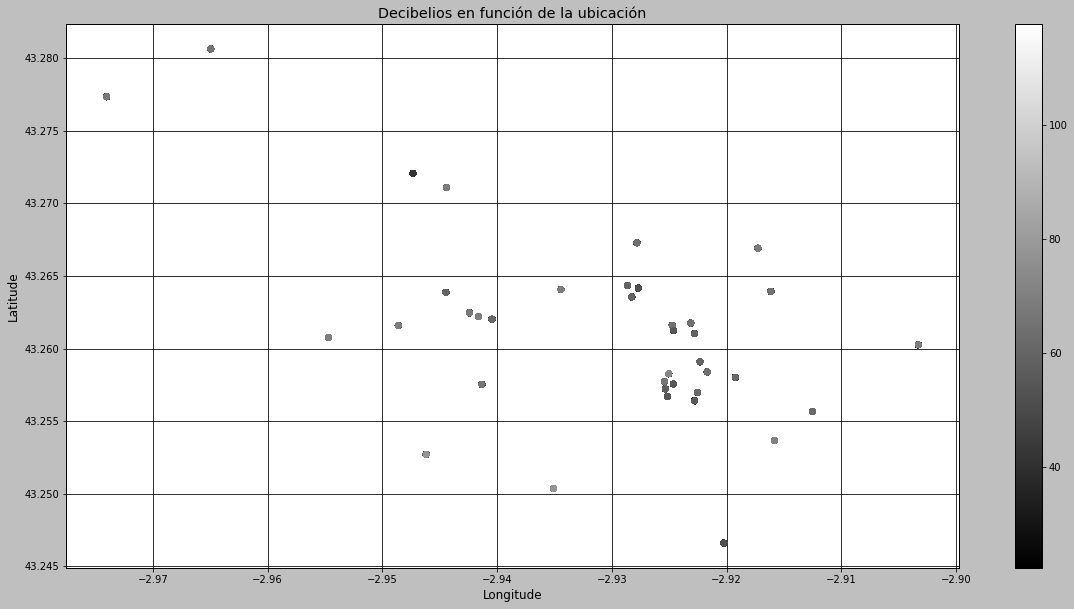

[58.67100815 59.1983688  58.64575109 58.76336843 68.50061667 65.79519903
 62.86616626 58.64575109 59.69036588 59.41984466 59.23039986 68.50061667
 59.21129464 58.2237384  65.79519903 63.16737797 58.91132753 58.91132753
 58.91132753 58.91132753]
0     51.599
5     62.623
7     42.600
9     54.023
16    49.200
26    50.051
27    67.100
42    44.400
43    52.198
46    66.569
48    51.600
49    48.700
52    48.400
55    58.830
60    47.414
75    47.977
80    36.800
82    34.500
90    49.900
96    48.800
Name: decibelios, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(20,10))
# Cargar los datos en un DataFrame
df2sonometros = dfsonometros.copy()

# Convertir la columna "decibelios" de cadenas a números
df2sonometros['decibelios'] = pd.to_numeric(df2sonometros['decibelios'])

# Reemplazar comas por puntos en las columnas "longitude" y "latitude"
df2sonometros['longitude'] = df2sonometros['longitude'].str.replace(',', '.').astype(float)
df2sonometros['latitude'] = df2sonometros['latitude'].str.replace(',', '.').astype(float)

# Graficar los datos en un diagrama de dispersión
plt.scatter(df2sonometros['longitude'], df2sonometros['latitude'], c=df2sonometros['decibelios'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Decibelios en función de la ubicación')
plt.colorbar()
plt.show()

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_data = df2sonometros.sample(frac=0.8, random_state=1)
test_data = df2sonometros.drop(train_data.index)

# Entrenar un modelo de regresión lineal utilizando la columna "decibelios" como variable de entrada
# y las columnas "longitude" y "latitude" como variables de salida
model = LinearRegression()
model.fit(train_data[['longitude', 'latitude']], train_data['decibelios'])

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_data[['longitude', 'latitude']])

# Imprimir las primeras 20 predicciones y los valores reales correspondientes
print(predictions[:20])
print(test_data['decibelios'][:20])

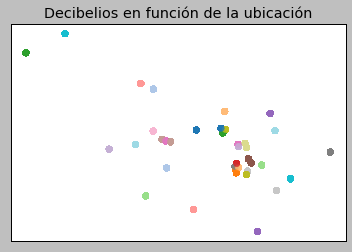

Promedio de las predicciones para MUELLE RIPA (RIA): 58.67
Valores reales para MUELLE RIPA (RIA):
0      51.599
130    55.143
190    52.352
475    55.321
590    54.003
Name: decibelios, dtype: float64

Promedio de las predicciones para JARDINES 6: 59.20
Valores reales para JARDINES 6:
5       62.623
425     58.031
593     64.161
995     61.585
1284    67.785
Name: decibelios, dtype: float64

Promedio de las predicciones para RIPA 5: 58.65
Valores reales para RIPA 5:
7       42.6
42      44.4
443     47.8
1611    48.3
1669    51.2
Name: decibelios, dtype: float64

Promedio de las predicciones para SOMERA 39: 58.76
Valores reales para SOMERA 39:
9       54.023
202     64.356
489     57.256
834     52.736
1233    54.519
Name: decibelios, dtype: float64

Promedio de las predicciones para FRAY JUAN 24: 68.50
Valores reales para FRAY JUAN 24:
16     49.2
49     48.7
216    44.2
329    41.5
502    41.2
Name: decibelios, dtype: float64

Promedio de las predicciones para ZARANDOA ESQUINA COLEGI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos en un DataFrame
df2sonometros = dfsonometros.copy()

# Convertir la columna "decibelios" de cadenas a números
df2sonometros['decibelios'] = pd.to_numeric(df2sonometros['decibelios'])

# Reemplazar comas por puntos en las columnas "longitude" y "latitude"
df2sonometros['longitude'] = df2sonometros['longitude'].str.replace(',', '.').astype(float)
df2sonometros['latitude'] = df2sonometros['latitude'].str.replace(',', '.').astype(float)

# Añadir la columna "Address" al DataFrame df2sonometros
df2sonometros['address'] = dfsonometros['address']

# Graficar los datos en un diagrama de dispersión
fig, ax = plt.subplots()
colors = df2sonometros['address'].astype('category').cat.codes
scatter = ax.scatter(df2sonometros['longitude'], df2sonometros['latitude'], c=colors, cmap='tab20', alpha=0.8)

# Eliminar los nombres de las calles del gráfico
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# Añadir título al gráfico
ax.set_title('Decibelios en función de la ubicación')

plt.show()

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_data = df2sonometros.sample(frac=0.8, random_state=1)
test_data = df2sonometros.drop(train_data.index)

# Entrenar un modelo de regresión lineal utilizando la columna "decibelios" como variable de entrada
# y las columnas "longitude" y "latitude" como variables de salida
model = LinearRegression()
model.fit(train_data[['longitude', 'latitude']], train_data['decibelios'])

for address in test_data['address'].unique():
    filtered_data = test_data[test_data['address'] == address]
    # Calcular las predicciones para el conjunto de prueba
    predictions = model.predict(filtered_data[['longitude', 'latitude']])
    # Calcular el promedio de las predicciones para cada dirección
    average = predictions.mean()
    # Mostrar el resultado promediado
    print(f"Promedio de las predicciones para {address}: {average:.2f}")
    print(f"Valores reales para {address}:")
    print(filtered_data['decibelios'].head())
    print()


In [ ]:
promedios = []

for address in test_data['address'].unique():
    filtered_data = test_data[test_data['address'] == address]
    # Calcular las predicciones para el conjunto de prueba
    predictions = model.predict(filtered_data[['longitude', 'latitude']])
    # Calcular el promedio de las predicciones para cada dirección
    average = predictions.mean()
    # Agregar el promedio a la lista de promedios
    promedios.append((address, average))

# Ordenar los promedios de mayor a menor
promedios_ordenados = sorted(promedios, key=lambda x: x[1], reverse=True)

# Mostrar los resultados
for direccion, promedio in promedios_ordenados:
    print("Dirección: ", direccion)
    print("Promedio de las predicciones: ", promedio)
    print()

Dirección:  FRAY JUAN 24
Promedio de las predicciones:  68.50061666659713

Dirección:  MONTEVIDEO (FRENTE HOSPITAL)(CÁMARA TRÁFICO)
Promedio de las predicciones:  66.12491039686483

Dirección:  ZARANDOA ESQUINA COLEGIO
Promedio de las predicciones:  65.7951990307838

Dirección:  GORDÓNIZ (CON GOYA)(CÁMARA TRÁFICO)
Promedio de las predicciones:  65.19105959761328

Dirección:  ZUNZUNEGUI JUNTO BOCA METRO
Promedio de las predicciones:  64.51624326713136

Dirección:  AUTONOMÍA 33 (ESQUINA GORDÓNIZ)(CÁMARA TRÁFICO)
Promedio de las predicciones:  63.30729158843861

Dirección:  RODRIGUEZ ARIAS   71 BIS
Promedio de las predicciones:  63.16737797217137

Dirección:  POZA 48
Promedio de las predicciones:  62.866166255716955

Dirección:  JUAN DE GARAI (ROTONDA)(CÁMARA TRÁFICO)
Promedio de las predicciones:  62.797016665457704

Dirección:  POZA 53 
Promedio de las predicciones:  62.70419620016855

Dirección:  LEHENDAKARI AGUIRRE  20-26
Promedio de las predicciones:  62.695252257733955

Dirección:  

In [ ]:
promedios = []

for address in test_data['address'].unique():
    filtered_data = test_data[test_data['address'] == address]
    # Agrupar los datos por dirección y hora
    grouped_data = filtered_data.groupby(['address', 'hora'])
    # Calcular las predicciones para cada grupo de datos
    predictions = grouped_data.apply(lambda x: model.predict(x[['longitude', 'latitude']]).mean())
    # Obtener la hora en la que se producen más decibelios por calle
    max_hour = predictions.idxmax()[1]
    # Obtener el promedio de las predicciones para cada dirección
    average = predictions.mean()
    # Agregar la dirección, el promedio y la hora en la que se producen más decibelios a la lista de promedios
    promedios.append((address, average, max_hour))

# Ordenar los promedios de mayor a menor
promedios_ordenados = sorted(promedios, key=lambda x: x[1], reverse=True)

# Mostrar los resultados
for direccion, promedio, hora in promedios_ordenados:
    print("Dirección: ", direccion)
    print("Hora en la que se producen más decibelios: ", hora)
    print("Promedio de las predicciones: ", promedio)
    print()

Dirección:  FRAY JUAN 24
Hora en la que se producen más decibelios:  Madrugada
Promedio de las predicciones:  68.50061666659713

Dirección:  MONTEVIDEO (FRENTE HOSPITAL)(CÁMARA TRÁFICO)
Hora en la que se producen más decibelios:  Madrugada
Promedio de las predicciones:  66.12491039686483

Dirección:  ZARANDOA ESQUINA COLEGIO
Hora en la que se producen más decibelios:  Mañana
Promedio de las predicciones:  65.7951990307838

Dirección:  GORDÓNIZ (CON GOYA)(CÁMARA TRÁFICO)
Hora en la que se producen más decibelios:  Madrugada
Promedio de las predicciones:  65.19105959761328

Dirección:  ZUNZUNEGUI JUNTO BOCA METRO
Hora en la que se producen más decibelios:  Madrugada
Promedio de las predicciones:  64.51624326713136

Dirección:  AUTONOMÍA 33 (ESQUINA GORDÓNIZ)(CÁMARA TRÁFICO)
Hora en la que se producen más decibelios:  Madrugada
Promedio de las predicciones:  63.3072915884386

Dirección:  RODRIGUEZ ARIAS   71 BIS
Hora en la que se producen más decibelios:  Madrugada
Promedio de las predicc

La red neuronal tiene como objetivo predecir el nivel de decibelios en función de la ubicación geográfica. 
Específicamente, se utiliza la columna "decibelios" como variable de entrada y las columnas "longitude" y "latitude" como variables de salida.

En cada epoch intentamos reducir el error de perdida.

La función de pérdida que se utiliza para entrenar la red neuronal es el error cuadrático medio (MSE), que mide la diferencia entre las predicciones del modelo y los valores reales de los datos. El objetivo del entrenamiento es minimizar la pérdida, para realizar futuras predicciones con datos nuevos.

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split



df2sonometros = dfsonometros.copy()
df2sonometros['decibelios'] = pd.to_numeric(df2sonometros['decibelios'])
df2sonometros['longitude'] = df2sonometros['longitude'].str.replace(',', '.').astype(float)
df2sonometros['latitude'] = df2sonometros['latitude'].str.replace(',', '.').astype(float)

train_data, test_data = train_test_split(df2sonometros, test_size=0.2, random_state=1)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[2]),  # Capa oculta con 64 neuronas
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona
])


model.compile(optimizer=tf.optimizers.Adam(), loss='mean_squared_error')


history = model.fit(train_data[['longitude', 'latitude']], train_data['decibelios'],
                    validation_split=0.2, epochs=50)

# Evalua el modelo en el conjunto de prueba
loss = model.evaluate(test_data[['longitude', 'latitude']], test_data['decibelios'])
print(f"Pérdida en el conjunto de prueba: {loss:.2f}")



Epoch 1/50
3378/3378 [==============================] - 17s 5ms/step - loss: 141.7113 - val_loss: 112.9816
Epoch 2/50
3378/3378 [==============================] - 16s 5ms/step - loss: 113.5241 - val_loss: 113.1497
Epoch 3/50
3378/3378 [==============================] - 9s 3ms/step - loss: 113.5076 - val_loss: 114.3136
Epoch 4/50
3378/3378 [==============================] - 9s 3ms/step - loss: 113.4613 - val_loss: 113.0379
Epoch 5/50
3378/3378 [==============================] - 9s 3ms/step - loss: 113.4746 - val_loss: 113.3092
Epoch 6/50
3378/3378 [==============================] - 10s 3ms/step - loss: 113.4670 - val_loss: 112.9780
Epoch 7/50
3378/3378 [==============================] - 9s 3ms/step - loss: 113.4054 - val_loss: 113.5246
Epoch 8/50
3378/3378 [==============================] - 8s 2ms/step - loss: 113.4436 - val_loss: 113.6161
Epoch 9/50
3378/3378 [==============================] - 9s 3ms/step - loss: 113.4252 - val_loss: 114.6170
Epoch 10/50
3378/3378 [====================

<Figure size 1440x720 with 0 Axes>

El resultado es el valor de la pérdida (loss) obtenido durante el entrenamiento de una red neuronal con dos conjuntos de datos diferentes: 
El conjunto de entrenamiento (con 3378 ejemplos) y el conjunto de prueba (con 1056 ejemplos). 
La pérdida se utiliza como una medida de la calidad del modelo, y se refiere a la diferencia entre las predicciones de la red neuronal y los valores reales de los datos.

En este caso, el valor de la pérdida obtenido en el conjunto de entrenamiento es 113.2052, mientras que en el conjunto de prueba es 112.8660. Estos valores indican que la red neuronal está logrando ajustarse bien a los datos de entrenamiento y a los datos de prueba.

Gráfica del entrenamiento

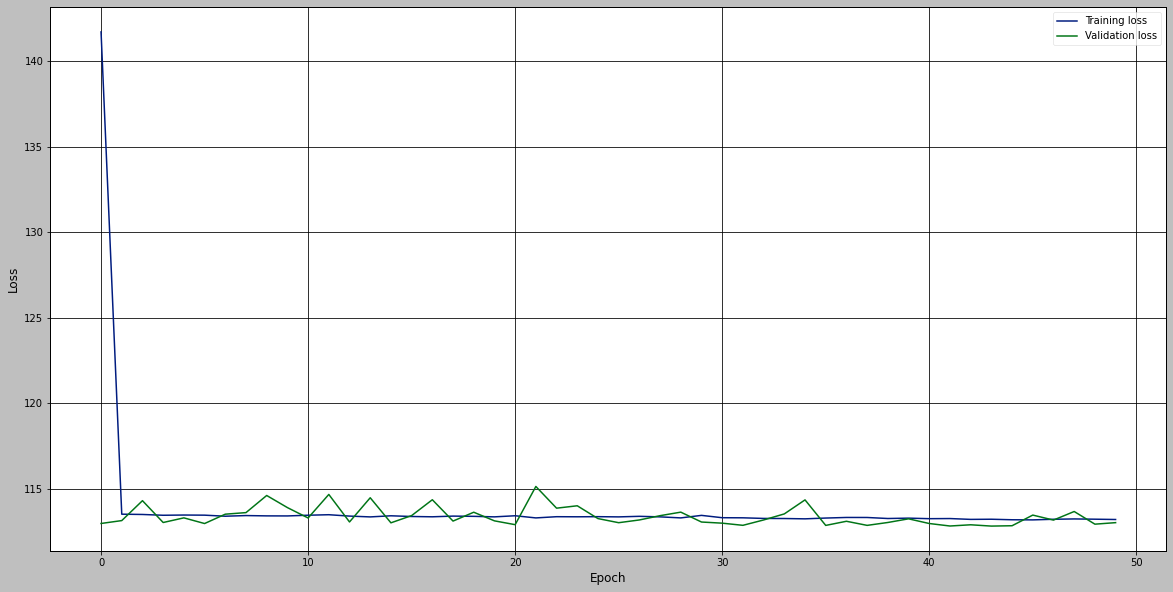

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
# Graficar la evolución de la pérdida en el conjunto de entrenamiento y de prueba
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()